##1 Lista de librerias

In [ ]:
pip install unidecode

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.9/235.9 kB 4.7 MB/s eta 0:00:00


In [ ]:
from sklearn.feature_selection import SelectKBest, f_regression
import pandas as pd
import numpy as np
import random
import warnings
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.feature_selection import RFE
from sklearn.decomposition import PCA
from sklearn.metrics import roc_auc_score, mean_squared_error, r2_score
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import cross_val_score
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, roc_auc_score, mean_squared_error, r2_score
from sklearn.utils import check_array
from sklearn.linear_model import ElasticNet
import matplotlib.pyplot as plt

random.seed(13)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


##2 Funciones

In [ ]:
%run '/content/drive/MyDrive/Colab Notebooks/Tesis_Functions.ipynb'

balancear_datos Loaded
Selectkbest_features Loaded
rfe_features Loaded
Integración de Variables Loaded
evaluacion de los modelos Loaded
Pca_components Loaded
Improtancia con XGBoost y Random forest Loaded
Random Forest Loaded
quitar_tildes Loaded
completar_datos_serie_tiempo Loaded
eliminar_filas_nan Loaded
cambiar_numeros_menores Loaded
normalize_variables Loaded
calcular_crecimiento_ingresos Loaded
obtener_variables_correlacionadas Loaded
generar_componentes_principales Loaded
rfe_with_elasticnet Loaded
calcular_crecimiento_promedio_por_categoria_Predial Loaded
categorizar_por_boxplot Loaded
calcular_crecimiento_promedio_por_categoria Loaded
limitar_atipicos Loaded
crear_dummies Loaded


##3 Generacion de variables relevantes

###3.1. Carga de datos

In [ ]:
#Carga de la Base 0
ruta_archivo = '/content/drive/My Drive/4_Proyect_Final/1_Datos/Base_0_Normalizada_regresion.csv'
Base_0 = pd.read_csv(ruta_archivo )
anios_a_eliminar=[2008, 2009, 2010]
Base_0 = Base_0[~Base_0['Year'].isin(anios_a_eliminar)]

In [ ]:
Base_0.head()

,Year,Municipio,Entranamiento,Crecimiento,Crecimiento_anterior_0,Crecimiento_anterior_1,Crecimiento_anterior_2,Crecimiento_anterior_3,Ambiente_area_amenazada,Ambiente_area_deforestada,...,Componente_Principal_221,Componente_Principal_220,Componente_Principal_230,Componente_Principal_238,Componente_Principal_239,Componente_Principal_253,Componente_Principal_255,Componente_Principal_265,Componente_Principal_279,Componente_Principal_281
3,2011,5001,entrenamiento,0.895454,0.405770,0.236050,0.000000,0.000000,0.403308,1.000000,...,-0.468771,-0.504845,-0.114762,-0.168923,-0.19027,0.043402,0.922984,1.208225,-0.633297,-0.489073
4,2012,5001,entrenamiento,1.049164,0.287074,0.405770,0.236050,0.000000,0.403308,0.579779,...,-0.468771,-0.504845,-0.132545,-0.168923,-0.19027,0.043402,0.922984,1.208225,-0.633297,-0.489073
5,2013,5001,entrenamiento,1.100320,0.566290,0.287074,0.405770,0.236050,0.403308,0.330409,...,-0.468771,-0.504845,-0.209898,-0.168923,-0.19027,0.043402,0.922984,1.208225,-0.633297,-0.489073
6,2014,5001,entrenamiento,1.255327,0.895454,0.566290,0.287074,0.405770,0.403308,0.141668,...,-0.468771,-0.504845,-0.214942,-0.168923,-0.19027,0.043402,0.922984,1.208225,-0.633297,-0.489073
7,2015,5001,entrenamiento,1.338857,1.049164,0.895454,0.566290,0.287074,0.403308,0.011658,...,-0.468771,-0.504845,-0.227466,-0.168923,-0.19027,0.043402,0.922984,1.208225,-0.633297,-0.489073


In [ ]:
Base_0_Train = Base_0.fillna(0)
Base_0_predict=Base_0_Train[Base_0_Train['Entranamiento']=='predicción']

In [ ]:
Base_0_Train=eliminar_outliers_iqr(Base_0_Train, 'Crecimiento')
Base_0_Train = Base_0_Train[Base_0_Train['Crecimiento'] != 0]
Base_0_Train=normalizar_variable_entre_0_y_1(Base_0_Train,'Crecimiento')
Base_0_Train = Base_0_Train[Base_0_Train['Crecimiento'] != 0]
Base_0_Train = Base_0_Train[Base_0_Train['Crecimiento'] > 0.1]

In [ ]:
Base_0_Train.head()

,Year,Municipio,Entranamiento,Crecimiento,Crecimiento_anterior_0,Crecimiento_anterior_1,Crecimiento_anterior_2,Crecimiento_anterior_3,Ambiente_area_amenazada,Ambiente_area_deforestada,...,Componente_Principal_221,Componente_Principal_220,Componente_Principal_230,Componente_Principal_238,Componente_Principal_239,Componente_Principal_253,Componente_Principal_255,Componente_Principal_265,Componente_Principal_279,Componente_Principal_281
3,2011,5001,entrenamiento,0.369242,0.405770,0.236050,0.000000,0.000000,0.403308,1.000000,...,-0.468771,-0.504845,-0.114762,-0.168923,-0.19027,0.043402,0.922984,1.208225,-0.633297,-0.489073
4,2012,5001,entrenamiento,0.399785,0.287074,0.405770,0.236050,0.000000,0.403308,0.579779,...,-0.468771,-0.504845,-0.132545,-0.168923,-0.19027,0.043402,0.922984,1.208225,-0.633297,-0.489073
5,2013,5001,entrenamiento,0.409950,0.566290,0.287074,0.405770,0.236050,0.403308,0.330409,...,-0.468771,-0.504845,-0.209898,-0.168923,-0.19027,0.043402,0.922984,1.208225,-0.633297,-0.489073
6,2014,5001,entrenamiento,0.440751,0.895454,0.566290,0.287074,0.405770,0.403308,0.141668,...,-0.468771,-0.504845,-0.214942,-0.168923,-0.19027,0.043402,0.922984,1.208225,-0.633297,-0.489073
7,2015,5001,entrenamiento,0.457348,1.049164,0.895454,0.566290,0.287074,0.403308,0.011658,...,-0.468771,-0.504845,-0.227466,-0.168923,-0.19027,0.043402,0.922984,1.208225,-0.633297,-0.489073


In [ ]:
#División del data set de entrenamiento y el que se va a predecir
Base_0_Train=Base_0_Train[Base_0_Train['Entranamiento']=='entrenamiento']
#Base_0_predict=Base_0_Train[Base_0_Train['Entranamiento']=='predicción']

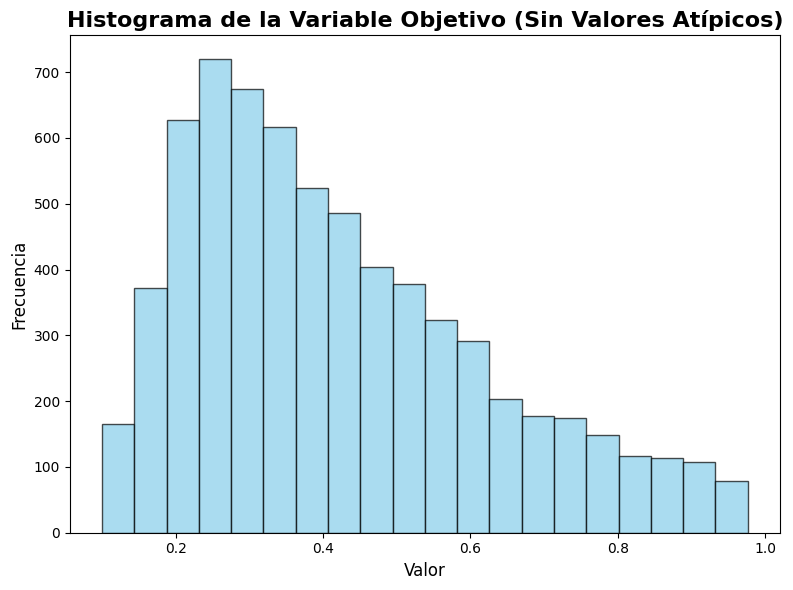

In [ ]:

# 1. Identificar los valores atípicos utilizando el rango intercuartil (IQR)
Q1 = Base_0_Train['Crecimiento'].quantile(0.25)
Q3 = Base_0_Train['Crecimiento'].quantile(0.75)
IQR = Q3 - Q1

# Definimos un umbral para identificar los valores atípicos
umbral_superior = Q3 + 1.5 * IQR
umbral_inferior = Q1 - 1.5 * IQR

# 2. Eliminar los valores atípicos del DataFrame
df_sin_atipicos = Base_0_Train[(Base_0_Train['Crecimiento'] >= umbral_inferior) & (Base_0_Train['Crecimiento'] <= umbral_superior)]

# 3. Generar el histograma sin los valores atípicos
plt.figure(figsize=(8, 6))
plt.hist(df_sin_atipicos['Crecimiento'], bins=20, color='skyblue', edgecolor='black', alpha=0.7)

# Configurar el título y etiquetas del gráfico
plt.title('Histograma de la Variable Objetivo (Sin Valores Atípicos)', fontsize=16, fontweight='bold')
plt.xlabel('Valor', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)

# Mostrar el gráfico
plt.tight_layout()
plt.show()

In [ ]:
# Calcular el histograma utilizando numpy.histogram
frecuencias, bins = np.histogram(df_sin_atipicos['Crecimiento'], bins=20)

# Imprimir las frecuencias y los bins
print("Frecuencias:", frecuencias)
print("Bins:", bins)


Frecuencias: [165 372 627 720 675 617 524 486 404 378 324 291 204 178 175 148 117 113
 108  78]
Bins: [0.10007974 0.14388719 0.18769463 0.23150208 0.27530953 0.31911697
 0.36292442 0.40673186 0.45053931 0.49434675 0.5381542  0.58196165
 0.62576909 0.66957654 0.71338398 0.75719143 0.80099887 0.84480632
 0.88861376 0.93242121 0.97622866]


###3.2. Selección de Variables con Selectkbest

In [ ]:
columnas_a_eliminar = ['Year', 'Municipio','Crecimiento','Entranamiento']
Base_0_X=Base_0_Train.drop(columnas_a_eliminar, axis=1)
Base_0_Y=pd.DataFrame(Base_0_Train['Crecimiento'])
y=np.ravel(Base_0_Y.values)


In [ ]:
Varaibles_Selectkbest=Selectkbest_features(Base_0_X, y, Base_0_X.shape[1])
#Calcular la suma total de la columna
suma_total = Varaibles_Selectkbest['Puntuacion'].sum()

# Normalizar los valores para que sumen 100%
Varaibles_Selectkbest['Importance_Selectkbest'] = (Varaibles_Selectkbest['Puntuacion'] / suma_total)

###3.4. Selección de Variables RFE

In [ ]:
varibales_rfe_ElasticNet=rfe_with_elasticnet(Base_0_X, y, Base_0_X.shape[1])
varibales_rfe_ElasticNet['Importance'] = varibales_rfe_ElasticNet['Importance'].abs()
#Calcular la suma total de la columna
suma_total = varibales_rfe_ElasticNet['Importance'].sum()
# Normalizar los valores para que sumen 100%
varibales_rfe_ElasticNet['Importance_ElasticNet'] = (varibales_rfe_ElasticNet['Importance'] / suma_total)

###3.5. Selección de Variables XGBoost

In [ ]:
varibales_rfe_XGBOOST=find_important_variables(Base_0_X, Base_0_Y, 'xgboost', n_estimators=100)
varibales_rfe_XGBOOST = varibales_rfe_XGBOOST.rename(columns={'Importance': 'Importance_XGBoost'})

###3.6. Selección de Variables Random Forest

In [ ]:
varibales_rfe_RandomForest=find_important_variables(Base_0_X, Base_0_Y, 'random_forest', n_estimators=50)
varibales_rfe_RandomForest = varibales_rfe_RandomForest.rename(columns={'Importance': 'Importance_RandomForest'})

<ipython-input-4-81948bd50163>:25: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_tensor, y_tensor)


###3.7. integración de variables

In [ ]:
Var_concat=Varaibles_Selectkbest.merge(varibales_rfe_ElasticNet, left_on='Variable', right_on='Feature', how='left')
Var_concat=Var_concat.merge(varibales_rfe_XGBOOST, on='Variable', how='left')
Var_concat=Var_concat.merge(varibales_rfe_RandomForest, on='Variable', how='left')
Var_concat=Var_concat[['Variable','Importance_Selectkbest','Importance_ElasticNet','Importance_XGBoost','Importance_RandomForest']]

In [ ]:
# Calcular la suma de las columnas
Var_concat['Suma_Importances'] = Var_concat[['Importance_Selectkbest', 'Importance_ElasticNet', 'Importance_XGBoost', 'Importance_RandomForest']].sum(axis=1)
#Calcular la suma total de la columna
suma_total = Var_concat['Suma_Importances'].sum()
# Normalizar los valores para que sumen 100%
Var_concat['Total_imp'] = (Var_concat['Suma_Importances'] / suma_total)
#Var_concat=Var_concat[['Variable','Total_imp']]


In [ ]:
ruta_archivo = '/content/drive/My Drive/4_Proyect_Final/1_Datos/Variables_Importantes_selector_Regresion.csv'
Var_concat.to_csv(ruta_archivo, index=False)
Var_concat.head()

,Variable,Importance_Selectkbest,Importance_ElasticNet,Importance_XGBoost,Importance_RandomForest,Suma_Importances,Total_imp
0,Crecimiento_anterior_0,1.784077e-01,NaN,0.056631,0.611817,0.846855,0.282285
1,Crecimiento_anterior_1,1.194685e-01,NaN,0.007340,0.019470,0.146279,0.048760
2,Crecimiento_anterior_2,7.623947e-02,NaN,0.001978,0.005026,0.083244,0.027748
3,Crecimiento_anterior_3,4.532897e-02,NaN,0.001711,0.003501,0.050542,0.016847
4,Ambiente_area_amenazada,1.063445e-07,NaN,0.000868,0.000475,0.001344,0.000448


In [ ]:
# Ordenar la columna en orden descendente
df_sorted = Var_concat.sort_values(by='Total_imp', ascending=False)
df_sorted=df_sorted.reset_index(drop=True)
# Calcular el porcentaje acumulado
porcentaje_acumulado = df_sorted['Total_imp'].cumsum() / df_sorted['Total_imp'].sum()

# Encontrar el índice que cumple con el umbral del 80%
indice_umbral = (porcentaje_acumulado >= 0.9).idxmax()

# Filtrar los datos hasta el índice umbral para obtener los datos de Pareto
datos_pareto = df_sorted.iloc[:indice_umbral + 1]

In [ ]:
#Creación del data set input con variables relevantes
Columnas_relevantes=datos_pareto['Variable'].values
df_Train=Base_0_X[Columnas_relevantes]
df_Predict_X=Base_0_predict[Columnas_relevantes]

In [ ]:
ruta_archivo = '/content/drive/My Drive/4_Proyect_Final/1_Datos/df_train.csv'
df_Train.to_csv(ruta_archivo, index=False)

In [ ]:
df_Train.head()

,Crecimiento_anterior_0,Crecimiento_anterior_1,OT_Estado_catastro_rural,Crecimiento_anterior_2,OT_Estado_catastro_urbano,Crecimiento_anterior_3,Componente_Principal_174,Componente_Principal_255,Componente_Principal_198,vivienda_servicios_publicos_PenetracionBandaAncha,...,Componente_Principal_104,Economia_Primer_Cultivo_Transitorio,vivienda_servicios_publicos_CoberturaAseoRuralCenso,OT_Conflicto_sobreutilizacion,Finanzas_valor_numero_total_proyectos,Economia_Transporte_almacenamiento_comunicaciones,Componente_Principal_102,Componente_Principal_230,Componente_Principal_34,Finanzas_valor_proyectos_terminados
3,0.405770,0.236050,0.0,0.000000,0.0,0.000000,0.981136,0.922984,0.31702,1.0,...,-0.192016,0.61923,0.0,0.435357,1.0,0.228940,-0.029884,-0.114762,0.917159,1.0
4,0.287074,0.405770,0.0,0.236050,0.0,0.000000,0.981136,0.922984,0.31702,1.0,...,-0.192016,0.61923,0.0,0.435357,1.0,0.231167,-0.029884,-0.132545,0.917159,1.0
5,0.566290,0.287074,0.0,0.405770,0.0,0.236050,0.981136,0.922984,0.31702,1.0,...,-0.192016,0.61923,0.0,0.435357,1.0,0.233395,-0.029884,-0.209898,0.917159,1.0
6,0.895454,0.566290,0.0,0.287074,0.0,0.405770,0.981136,0.922984,0.31702,1.0,...,-0.192016,0.61923,0.0,0.435357,1.0,0.237851,-0.029884,-0.214942,0.917159,1.0
7,1.049164,0.895454,0.0,0.566290,0.0,0.287074,0.981136,0.922984,0.31702,1.0,...,-0.192016,0.61923,0.0,0.435357,1.0,0.254337,-0.029884,-0.227466,0.917159,1.0


##4 Generacion Componentes principales

In [ ]:
archivo_csv = '/content/drive/My Drive/4_Proyect_Final/1_Datos/df_train.csv'
df_Train = pd.read_csv(archivo_csv)

In [ ]:
#ruta_archivo = '/content/drive/My Drive/4_Proyect_Final/1_Datos/df_train_Respaldo.csv'
#df.to_csv(ruta_archivo, index=False)

In [ ]:
#X con todas las variables
#X=Base_0_X

In [ ]:
#X con variables filtradas por procesos
#X=df_Train[['Crecimiento_anterior_0','Crecimiento_anterior_1','Crecimiento_anterior_2','Crecimiento_anterior_3']]

In [ ]:
X=df_Train

In [ ]:
#x de componentes principales
#X=generar_componentes_principales_X(df_Train, 5)

In [ ]:
#Base_0_Y=pd.DataFrame(Base_0_Train['Crecimiento'])
#y=np.ravel(Base_0_Y.values)

##5 Genracion de los grupos Test y control

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X, Base_0_Y, test_size=0.2)
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2)

In [ ]:
X_test.head()

,Crecimiento_anterior_0,Crecimiento_anterior_1,OT_Estado_catastro_rural,Crecimiento_anterior_2,OT_Estado_catastro_urbano,Crecimiento_anterior_3,Componente_Principal_174,Componente_Principal_255,Componente_Principal_198,vivienda_servicios_publicos_PenetracionBandaAncha,...,Componente_Principal_104,Economia_Primer_Cultivo_Transitorio,vivienda_servicios_publicos_CoberturaAseoRuralCenso,OT_Conflicto_sobreutilizacion,Finanzas_valor_numero_total_proyectos,Economia_Transporte_almacenamiento_comunicaciones,Componente_Principal_102,Componente_Principal_230,Componente_Principal_34,Finanzas_valor_proyectos_terminados
3807,1.870121,0.690937,0.5,0.499097,1.0,0.478310,-0.377320,-0.224072,-0.371138,0.029267,...,-0.210020,0.297159,0.005508,0.455697,0.381168,0.313152,-0.128378,-0.154794,-0.315016,0.504801
5028,0.897225,0.265345,0.0,0.199013,0.0,0.070222,0.117861,0.842640,-0.166197,0.205855,...,-0.542250,0.848264,0.955582,0.041800,0.323383,0.238074,-0.391636,-0.288977,-0.185370,0.142031
1387,0.285254,0.095588,0.5,0.477125,1.0,0.663889,-0.381082,-0.406971,-0.357000,0.302294,...,-0.537116,0.900629,0.007203,0.026339,0.071222,0.530591,-0.422019,-0.105359,-0.322958,0.047162
2912,-0.201582,-0.333038,0.5,-0.219574,1.0,-0.307773,-0.168827,-0.097292,0.611936,0.214515,...,-0.047793,1.000000,0.088836,0.097351,0.108294,0.293993,-0.122590,-0.156289,-0.114703,0.107565
78,0.160463,0.692747,0.5,0.337881,0.0,-0.040208,-0.303123,-0.052738,-0.375617,0.283006,...,-0.244781,0.005550,0.238542,0.389480,0.049211,0.568019,-0.207742,-0.197579,-0.175148,0.084231


##6 Random Forest

In [ ]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

In [ ]:
param_grid = {
    'n_estimators': [100],
    'max_depth': [None],
    'min_samples_split': [2]
}

In [ ]:
# Generar la predicción y evaluación del modelo RandomForestRegressor
y_train2=np.ravel(y_train.values)
y_test2=np.ravel(y_test.values)

RF_model,y_pred, best_params = random_forest_regression(X_train, X_test, y_train2, y_test2, param_grid)


In [ ]:
best_params

In [ ]:
result_df,r2,mse,mape=obtener_resultados_modelo(RF_model, X_test, y_test)
mse, r2, mape

(0.01179554721441055, 0.722544587005857, 21.814044521798497)

In [ ]:
result_df,r2,mse,mape=obtener_resultados_modelo(RF_model, X_val, y_val)
mse, r2, mape

(0.012607323121596611, 0.7072477636348053, 21.929123211763265)

##7 Resultados del modelo XG_BOOST

In [ ]:
param_grid = {
    'n_estimators': [100, 200, 300],  # Número de árboles en el modelo
    'learning_rate': [0.01, 0.05, 0.1],  # Tasa de aprendizaje
    'max_depth': [3, 5, 7],  # Profundidad máxima del árbol
    'subsample': [0.8, 1.0],  # Porcentaje de muestras utilizadas para entrenar cada árbol
    'colsample_bytree': [0.8, 1.0],  # Porcentaje de características utilizadas para entrenar cada árbol
    'gamma': [0, 0.1, 0.2],  # Parámetro de penalización para la división de un nodo
    'reg_alpha': [0, 0.1, 0.5],  # Término de regularización L1
    'reg_lambda': [0, 0.1, 0.5],  # Término de regularización L2
    'min_child_weight': [1, 3, 5],  # Peso mínimo de la muestra necesaria en un nodo hoja
}

In [ ]:
param_grid = {
    'max_depth': [10,20,30,40],
    'learning_rate': [0.1,0.3,0.4],
    'n_estimators': [100, 200, 300,600,800],
    'colsample_bytree': [0.8, 1.0],
    'gamma': [0, 0.1, 0.2],
    'reg_alpha': [0, 0.1, 0.5,0.8],
    'reg_lambda': [0, 0.1, 0.5,0.6],
    'min_child_weight': [1, 3, 5],
    'subsample': [0.2,0.5,0.8, 1.0]
}

In [ ]:
param_grid = {
        'max_depth': [30],
        'learning_rate': [0.3],
        'n_estimators': [600],
        'colsample_bytree': [0.1],
        'gamma': [0],
        'reg_alpha': [0.8],
        'reg_lambda': [0.5],
        'min_child_weight': [3],
        'subsample': [1.0]
    }

In [ ]:
# Generar la predicción y evaluación del modelo XGBoost

xgb_best_model,y_pred, best_params, mse, r2, mape = xgboost_model_evaluation(X_train, X_test, y_train, y_test, param_grid)


In [ ]:
best_params

{'colsample_bytree': 0.1,
 'gamma': 0,
 'learning_rate': 0.3,
 'max_depth': 30,
 'min_child_weight': 3,
 'n_estimators': 600,
 'reg_alpha': 0.8,
 'reg_lambda': 0.5,
 'subsample': 1.0}

In [ ]:
mse, r2, mape

(0.011047755520295825, 0.7335769048412646, 0.2127562772194724)

In [ ]:
result_df,r2,mse,mape=obtener_resultados_modelo(xgb_best_model, X_val, y_val)

In [ ]:
mse, r2, mape

(0.010464472748382966, 0.7462490263610231, 20.51931465331029)

In [ ]:


# Obtener la importancia de las variables
importances = xgb_best_model.feature_importances_

# Crear el DataFrame de importancia de variables
importance_df = pd.DataFrame({'Variable': X_train.columns, 'Importance': importances})

# Ordenar el DataFrame por importancia descendente
importance_df = importance_df.sort_values(by='Importance', ascending=False)

ruta_archivo = '/content/drive/My Drive/4_Proyect_Final/1_Datos/Variables_Importantes_XGBoost_Regresion.csv'
importance_df.to_csv(ruta_archivo, index=False)

# Imprimir el DataFrame
importance_df.head()



,Variable,Importance
1,Crecimiento_anterior_1,0.119553
4,OT_Estado_catastro_urbano,0.049839
0,Crecimiento_anterior_0,0.044030
8,Componente_Principal_198,0.041771
154,OT_Conflicto_subutilizacion,0.036759


In [ ]:
##direrencia entrey test y los pronosticados
df_y_pred = pd.DataFrame(data=y_pred, columns=['Y_predict'])
y=y_test.reset_index(drop=True)

y_pred_column = pd.Series(y_pred)
# Crear el DataFrame con las columnas y_test y Y_predict
result_df = pd.DataFrame({'y_test': y['Crecimiento'], 'Y_predict': df_y_pred['Y_predict']})

# Agregar una tercera columna que muestre la diferencia entre y_test y Y_predict
result_df['Diferencia'] = result_df['Y_predict'] - result_df['y_test']

In [ ]:
result_df

# 8 Generacion de la Recomendacion

In [ ]:
y_pred = xgb_best_model.predict(df_Predict_X)

In [ ]:
Recomendacion=Base_0_predict[['Year','Municipio']].copy()
Recomendacion.loc[:, 'y_pred'] =y_pred
ruta_archivo = '/content/drive/My Drive/4_Proyect_Final/1_Datos/Recomendacion_XGBoost_Regresion.csv'
Recomendacion.to_csv(ruta_archivo, index=False)
Recomendacion.head()

,Year,Municipio,y_pred
10,2018,5001,0.572841
11,2019,5001,0.567176
12,2020,5001,0.649087
23,2018,5002,0.433081
24,2019,5002,0.437239
